<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project1</h3>
</div>

<img src = "https://www.cyclonis.com/images/2020/03/googleplay.jpg" width=50%>

## Importing the libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [91]:
import pandas as pd

# Load the data from the uploaded CSV file
file_path = 'googleplaystore.csv'
google_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
google_df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

## EDA
- at this section we will have a look to column names and further investigate columns data formats specially those could be in numerical format like: Installs, Review, Price, and Rating.

In [92]:
google_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [93]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


- cleaning the "Category" column.

In [94]:
unique_category = google_df['Category'].unique()
print(unique_category)
print(len(unique_category))

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
34


In [95]:
# the above cell showed us that there is a wierd Category called '1.9'. after further inevestigation we realized that
# this column doesn't have any data in it and could be an artifact
# thus we decided to remove that from our data.
noise = google_df[google_df['Category'] == '1.9'].value_counts()
print(noise)

google_df = google_df[google_df['Category'] != '1.9']

Series([], Name: count, dtype: int64)


## check for columns that could be in numercal format

In [96]:
# Display the unique values in the 'Installs' column to identify problematic entries
unique_installs = google_df['Installs'].unique()
unique_installs


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [97]:
# Display the unique values in the 'Review' column to identify problematic entries
unique_reviews = google_df['Reviews'].unique()
print(unique_reviews)

['159' '967' '87510' ... '603' '1195' '398307']


In [98]:
unique_price = google_df['Price'].unique()
unique_price

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [99]:
# Display the unique values in the 'Installs' column to identify problematic entries
unique_size = google_df['Size'].unique()
unique_size

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [100]:
# Count the occurrences of each unique value in the 'Size' column
size_counts = google_df['Size'].value_counts()

# Get the count for "Varies with device"
varies_count = size_counts.get("Varies with device", 0)
print(f'Number of "Varies with device" entries: {varies_count}')


Number of "Varies with device" entries: 1695


# Data Preprocessing

- lets convert some of the columns that to numeric form because they are more informative in this format.

In [101]:
# Step 1: Remove commas and plus signs, and replace
google_df['Installs'] = google_df['Installs'].str.replace(',', '').str.replace('+', '')

# Step 2: Convert the column to a numeric type (int)
google_df['Installs'] = pd.to_numeric(google_df['Installs'])

In [102]:
# Step 2: Convert the column to a numeric type (int)
google_df['Reviews'] = pd.to_numeric(google_df['Reviews'])

In [103]:
# Step 3: Remove commas and plus signs, and replace 
google_df['Price'] = google_df['Price'].str.replace('$', '')
# Step 2: Convert the column to a numeric type (int)
google_df['Price'] = pd.to_numeric(google_df['Price'])

In [104]:

# Convert sizes to numeric, excluding "Varies with device"
def convert_size(size):
    if size == "Varies with device":
        return np.nan
    if 'M' in size:
        return float(size.replace('M', '')) * 1000  # Convert Megabytes to Kilobytes
    elif 'k' in size:
        return float(size.replace('k', ''))  # Keep Kilobytes as is
    else:
        return np.nan  # Handle any unexpected formats

google_df['Size'] = google_df['Size'].apply(convert_size)

In [105]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


- Let's fill the nan values in the Rating and Size column.

In [106]:
# Fill NaN values in the Rating column based on the mean rating for each category
category_rating_means = google_df.groupby('Category')['Rating'].transform('mean').round(1)
google_df['Rating'] = google_df['Rating'].fillna(category_rating_means)


In [114]:
# Fill NaN values in the Rating column based on the mean rating for each category
category_size_means = google_df.groupby('Category')['Size'].transform('mean')
google_df['Size'] = google_df['Size'].fillna(category_size_means)

In [115]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [110]:
count_type_values = google_df['Type'].value_counts(dropna=False)
print(count_type_values)


Type
Free    10039
Paid      800
NaN         1
Name: count, dtype: int64


## Strorytelling - Visualization

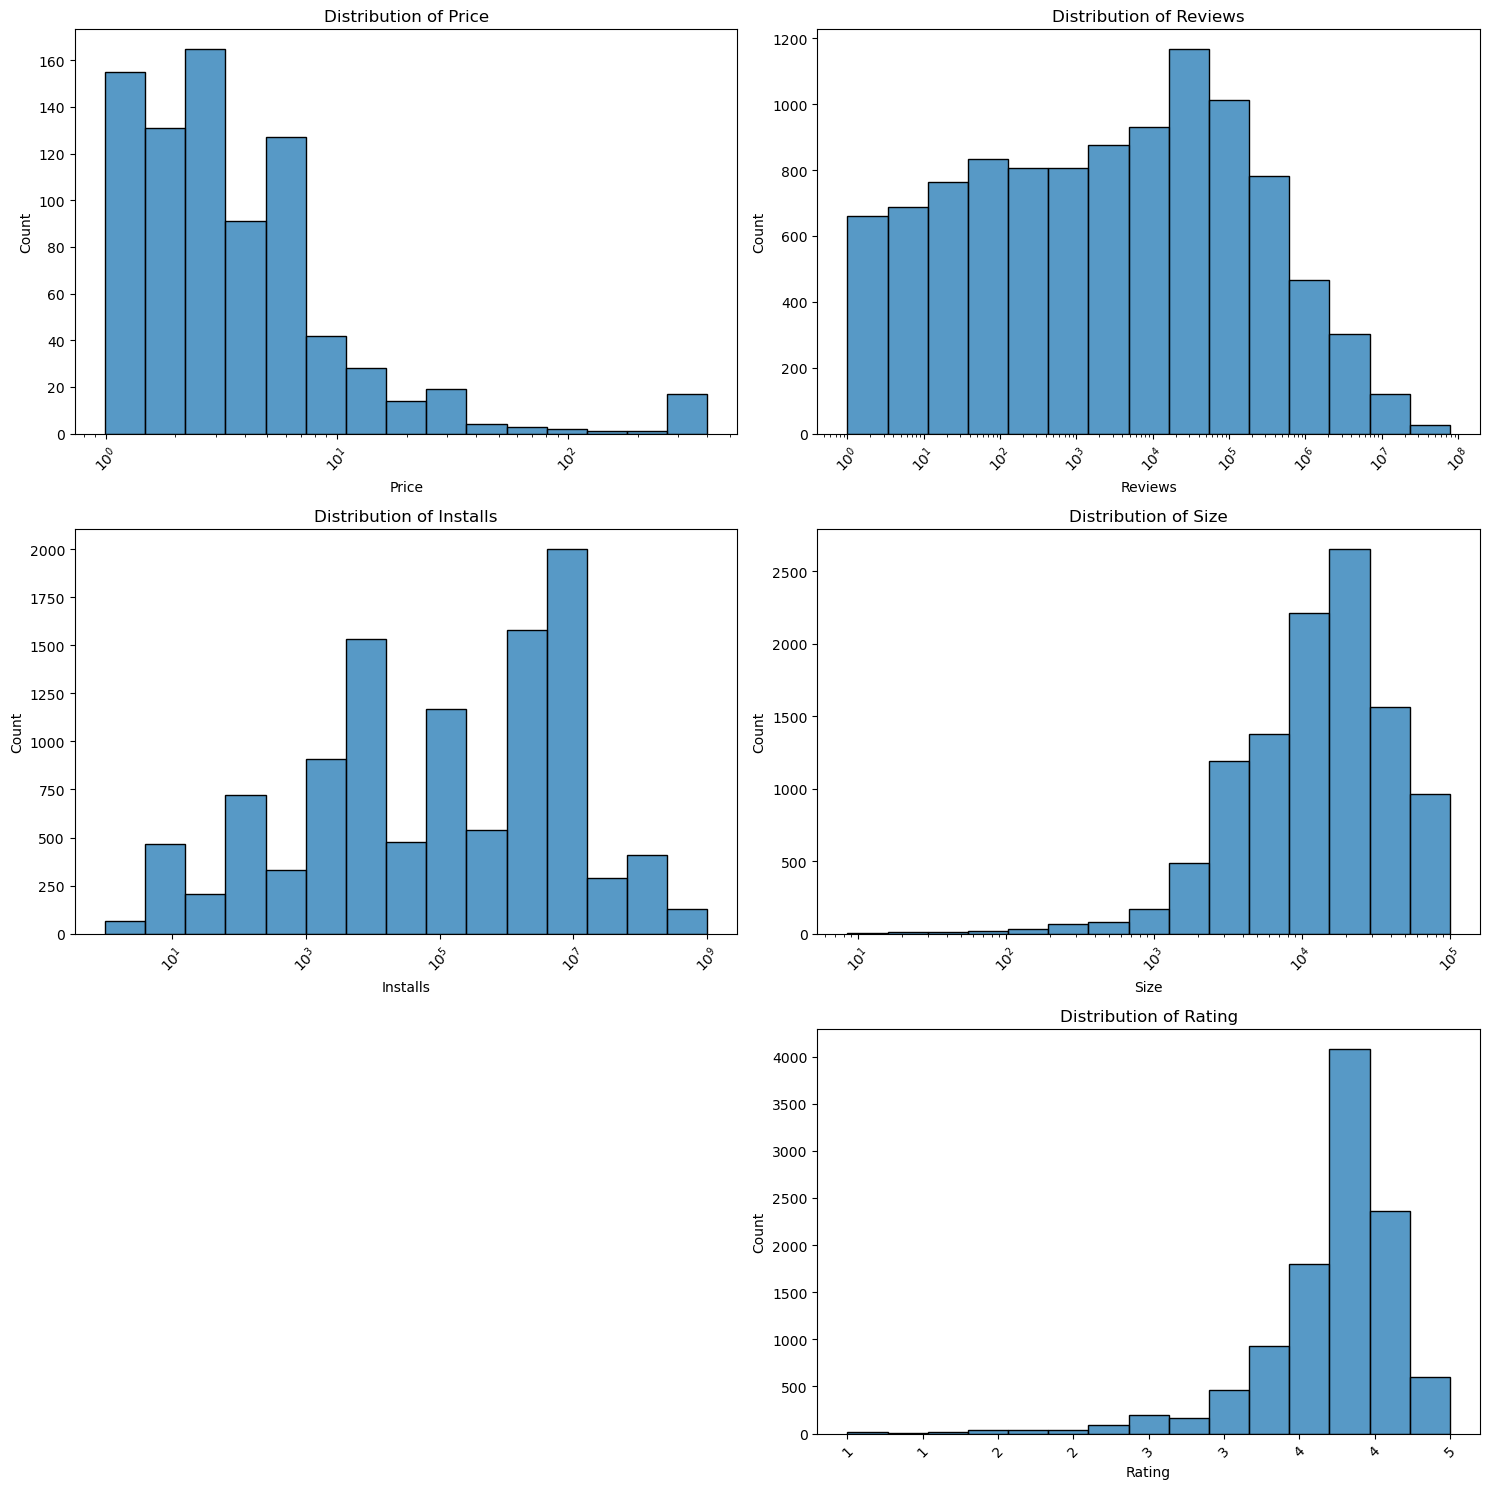

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# List of columns to plot
columns = ['Price', 'Reviews', 'Installs', 'Size']
num_bins = 15  # Adjust this number to make bins larger or smaller

# Iterate over the columns and create a plot for each
for i, col in enumerate(columns):
    row = i // 2
    col_pos = i % 2
    sns.histplot(data=google_df, x=col, ax=axs[row, col_pos], log_scale=True, bins=num_bins, palette='viridis')
    axs[row, col_pos].set_title(f'Distribution of {col}')
    axs[row, col_pos].set_xlabel(col)
    axs[row, col_pos].set_ylabel('Count')
    axs[row, col_pos].tick_params(axis='x', rotation=45)

# Create the Rating plot at the bottom middle
sns.histplot(data=google_df, x='Rating', ax=axs[2, 1], bins=num_bins, palette='viridis')
axs[2, 1].set_title('Distribution of Rating')
axs[2, 1].set_xlabel('Rating')
axs[2, 1].set_ylabel('Count')
axs[2, 1].tick_params(axis='x', rotation=45)

# Remove the empty subplot
fig.delaxes(axs[2, 0])

# Format the x-axis of the Rating plot to show simple numbers
axs[2, 1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


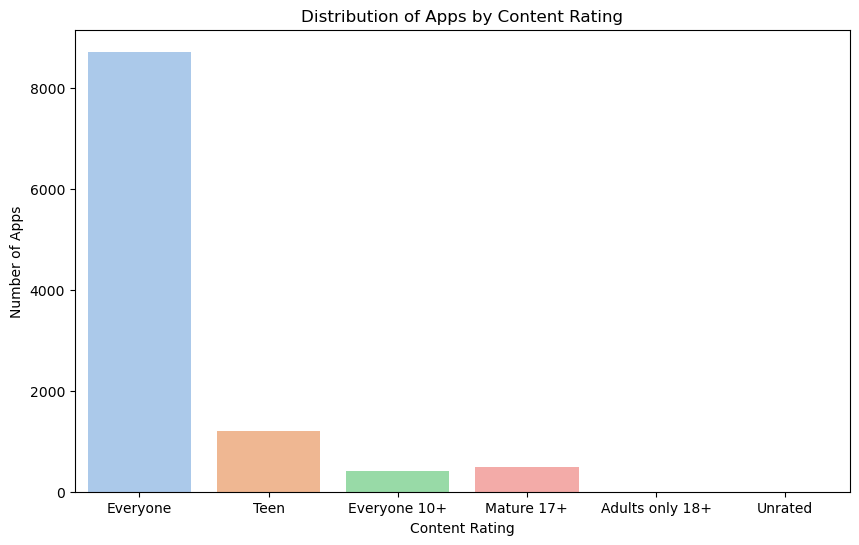

In [131]:
plt.figure(figsize=(10, 6))

# Bar plot of the number of apps per Content Rating
sns.countplot(x='Content Rating', data=google_df, palette='pastel')

# Add titles and labels
plt.title('Distribution of Apps by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.show()


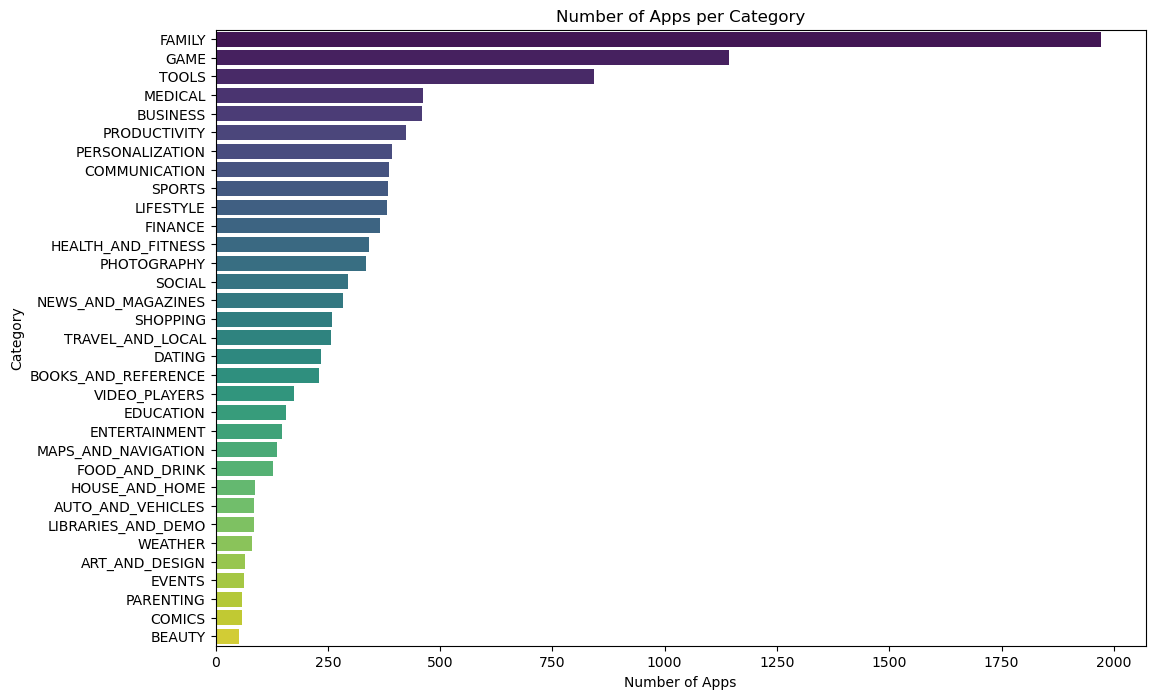

In [127]:
plt.figure(figsize=(12, 8))

# Bar plot of the number of apps per Category
sns.countplot(y='Category', data=google_df, palette='viridis', order=google_df['Category'].value_counts().index)

# Add titles and labels
plt.title('Number of Apps per Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()


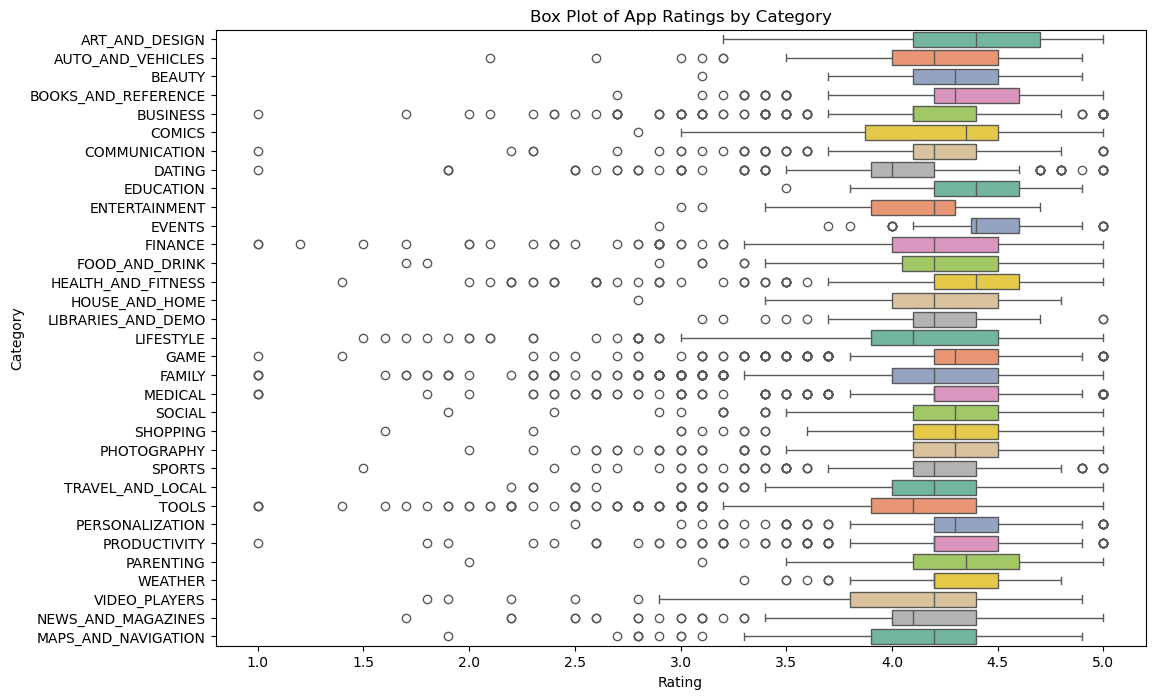

In [126]:
plt.figure(figsize=(12, 8))

# Boxplot of Ratings by Category
sns.boxplot(x='Rating', y='Category', data=google_df, palette='Set2')

# Add titles and labels
plt.title('Box Plot of App Ratings by Category')
plt.xlabel('Rating')
plt.ylabel('Category')
plt.show()


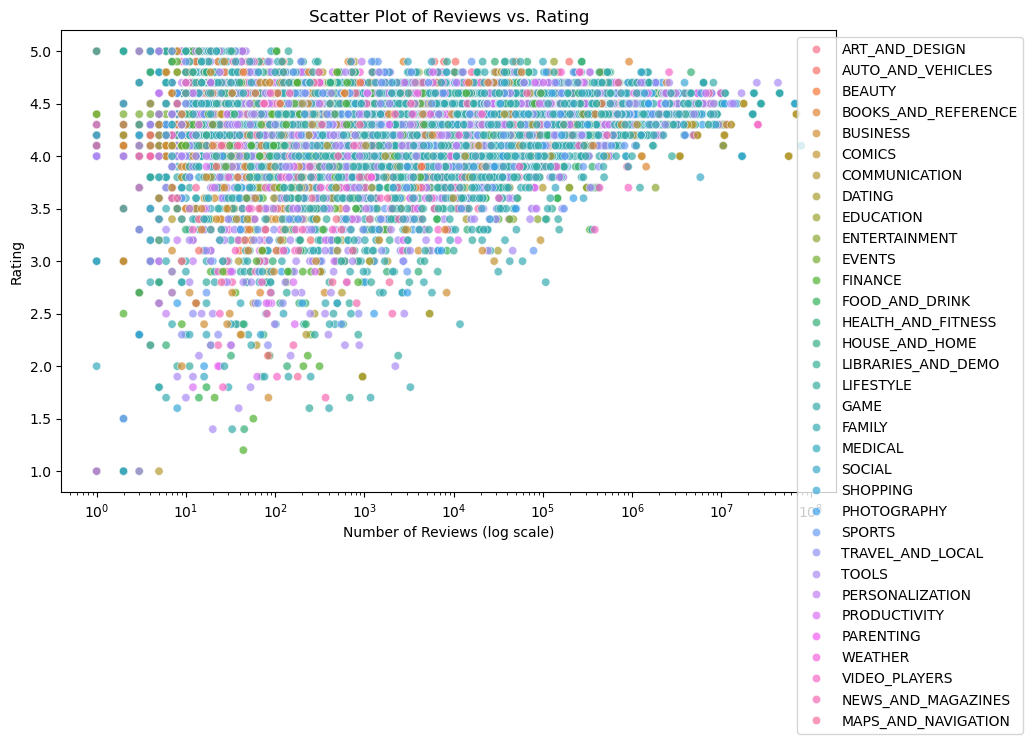

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Scatter plot of Reviews vs. Rating
scatter = sns.scatterplot(x='Reviews', y='Rating', data=google_df, hue='Category', alpha=0.7)

# Set log scale for the x-axis
scatter.set_xscale('log')

# Add titles and labels
plt.title('Scatter Plot of Reviews vs. Rating')
plt.xlabel('Number of Reviews (log scale)')
plt.ylabel('Rating')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Show the plot
plt.show()


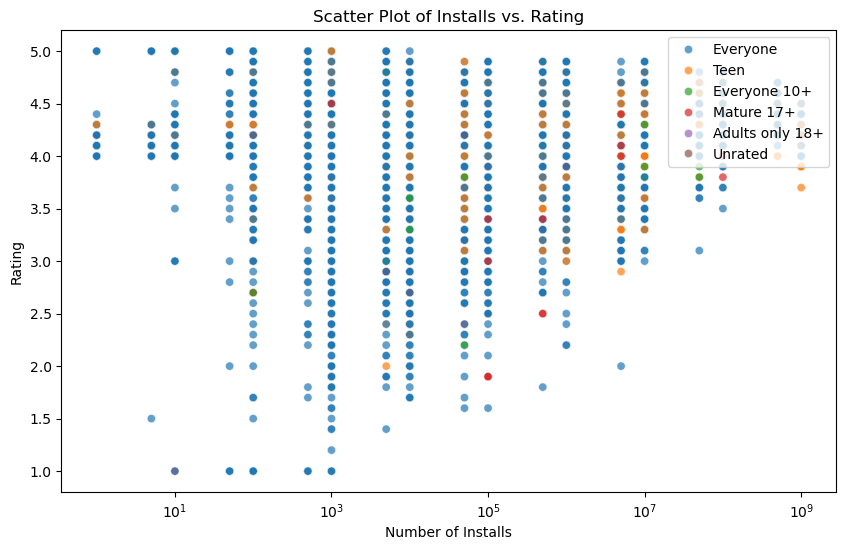

In [130]:
plt.figure(figsize=(10, 6))

# Scatter plot of Installs vs. Rating
sns.scatterplot(x='Installs', y='Rating', data=google_df, hue='Content Rating', alpha=0.7)

# Add titles and labels
plt.title('Scatter Plot of Installs vs. Rating')
plt.xlabel('Number of Installs')
plt.ylabel('Rating')
plt.xscale('log')  # Since install numbers can be large, use log scale
plt.legend(loc='upper right')
plt.show()


In [162]:
# Example with Plotly
import plotly.express as px

# Interactive scatter plot
fig = px.scatter(google_df, x='Rating', y='Reviews', color='Category', hover_data=['App'])
fig.update_layout(title='Interactive Scatter Plot of Ratings vs Reviews')
fig.show()


In [136]:

# Select only the numeric columns
numeric_columns = google_df.select_dtypes(include=['float64', 'int64'])

# Check the numeric columns
print(numeric_columns.columns)



Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price'], dtype='object')


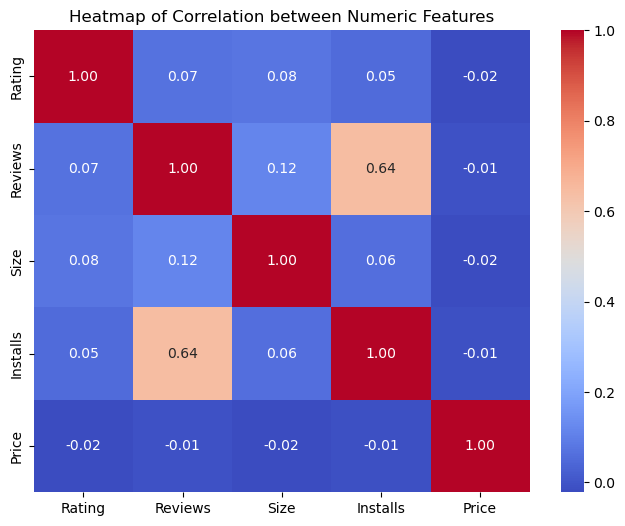

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Heatmap of correlations for numeric features only
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Heatmap of Correlation between Numeric Features')
plt.show()


## Send us the Result (Maktabkhoone)